## Q3: (100 point) 
- Support Vector Machine. Please follow the instructions of Q3 to fulfill the demo code, then execute linear regression program and show related results.

### Instruction for Support Vector Machine


#### Background
You are given 100 two dimension data points with 2 classes injected by some noise. 
You need to train a support vector machine model with RBF kernel and try to tune hyper-parameter $C$ to improve its performance.



#### Task
1. The entire training program is provided, you should first implement some metrics on validation dataset to test model's performance.
2. Then, you should try more choices about $C$ to find the best $C$ that maximizes your defined metric.


#### System Requirements
We require you use Python 3.x and related packages such as numpy, scikit-learn and matplotlib.



#### Reference

https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png

Load data successfully: total sample number=100
proposed_C =  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Training SVM with C=1 and metric=0.0500
Training SVM with C=2 and metric=0.0000
Training SVM with C=3 and metric=0.0000
Training SVM with C=4 and metric=0.0000
Training SVM with C=5 and metric=0.0000
Training SVM with C=6 and metric=0.0000
Training SVM with C=7 and metric=0.0000
Training SVM with C=8 and metric=0.0000
Training SVM with C=9 and metric=0.0000


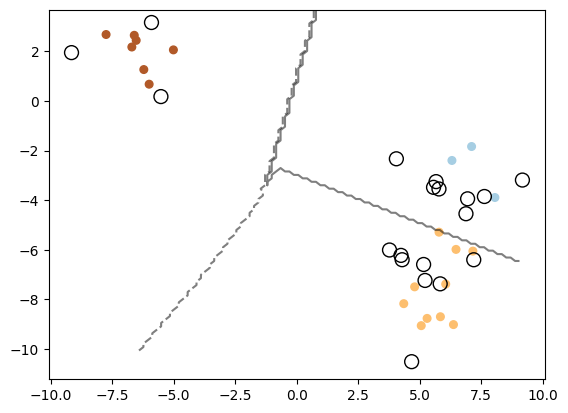

The final result: the best C for the validation set is: 1


In [19]:
import numpy as np
from sklearn import svm, datasets
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt


# Input: current parameters m and b; data points, learning rate;
# Output: Updated new parameters m and b by using gradient descent.
def train_and_validate(training_data, validation_data, C):
    x, y = training_data
    # train the model
    clf = svm.SVC(kernel="rbf", C=C)
    clf.fit(x, y)
    # validate
    x, y = validation_data
    prediction_y = clf.predict(x)
    # [TASK] You should implement metric to evaluate model's performance
    metric = 0
    for i in range(len(y)):
        metric = metric + (prediction_y[i] - y[i])**2
    metric = metric / float(len(y))
    return clf, metric
    


# draw the decision boundary and support vector
def draw_plot(clf, data):
    # plot the decision function
    x, y = data
    plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()


def run():
    # refer to API doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm
    # set random seet for reproducibility
    np.random.seed(42)
    # generate data
    N = 100
    x, y = make_blobs(n_samples=N, centers=3, random_state=6)
    # add some noise for construct more real data
    x = x * np.random.uniform(0.7, 1.0, size=x.shape)
    # divide training set and validation_set
    sep = int(0.2 * N)
    training_x, training_y = x[:-sep], y[:-sep]
    validation_x, validation_y = x[-sep:], y[-sep:]
    
    print("Load data successfully: total sample number={}".format(N))
    # [TASK] You should try more C choice for better metric on validation dataset
    
    proposed_C = []
    for i in range(1,10):
        proposed_C.append(i)
    print("proposed_C = ",proposed_C)
    best_metric = 0.
    best_clf = None
    best_C = None
    for C in proposed_C:
        clf, metric = train_and_validate((training_x, training_y), (validation_x, validation_y), C=C)
        print('Training SVM with C={} and metric={:.4f}'.format(C, metric))
        if metric > best_metric:
            best_metric = metric
            best_clf = clf
            best_C = C
    draw_plot(best_clf, (validation_x, validation_y))
    print('The final result: the best C for the validation set is: {}'.format(best_C))


if __name__ == '__main__':
    run()